## <center>Report of homework02 IFT6390</center>

#### Team Member
Lifeng Wan (20108546), Qiang Ye (20139927)
#### Coding Environment
python 3.5.2, numpy 1.14.2 matplotlib 2.2.0

---------------

### 1 Linear and non-linear regularized regression (50 points)

#### 1.1 Linear Regression

For training dataset $D_{n}$ with $n$ samples (input, target):

$$D_{n} = \{(\mathbf x^{(1)},t^{(1)}),\cdots,(\mathbf x^{(n)},t^{(n)})\}$$

with $\mathbf x^{(i)} \in \mathbb R^d$ and $t^{(i)} \in \mathbb R$.

The linear regression assumes a parametrized form for the function $f$ which predicts the value of the target from a new data point $\mathbf x$. (More precisely, it seeks to predict the expectation of the target variable conditioned on the input variable $f(\mathbf x)\simeq \mathbb E[t|\mathbf x]$.)

The parametrization is a linear transformation of the input, or more precisely an $affine$ transformation.
$$f(\mathbf x)\ =\mathbf w^T\mathbf x+b$$

1. Precise this model's set of parameters $\theta$, as well as the nature and dimensionality of each of them.  
**Answer** $\theta = \{\mathbf w,\ b\}$, where $\mathbf w \in \mathbb R^d$ is a weight vector and $b \in \mathbb R$ is called as a bias.<hr>

2. The loss function typically used for linear regression is the quadratic loss:
$$L((\mathbf x, t),\ f ) = (f (\mathbf x) − t)^2$$
We are now defining the <b>empirical risk</b> $\hat{R}$ on the set $D_n$ as the <b>sum</b> of the losses on this set (instead of the average of the losses as it is sometimes defined). Give the precise mathematical formula of this risk.  
**Answer** \begin{aligned}
\hat R(\ f_{\theta},\ \mathbb D_n) &= \sum_{i=1}^{n} L\bigl((\mathbf x^{(i)},\ t^{(i)}),\ f_{\theta}\bigr)\\
&= \sum_{i=1}^{n} \bigl( f_{\theta}(\mathbf x^{(i)}) - t^{(i)}\bigr)^2\\
\end{aligned}<hr>

3. Following the principle of Empirical Risk Minimization (ERM), we are going to seek the parameters which yield the smallest quadratic loss. Write a mathematical formulation of this minimization problem.  
**Answer** Let $\theta^{\star}$ be the parameters which yield the smallest quadratic loss, then:
$$\theta^{\star} = \underset{\theta}{argmin}\ \hat R(\ f_{\theta}, \mathbb D_n)$$<hr>

4. A general algorithm for solving this optimization problem is gradient descent. Give a formula for the gradient of the empirical risk with respect to each parameter.  
**Answer** 
\begin{aligned}
\frac{\partial\ \hat R(\ f_{\theta},\ \mathbb D_n)}{\partial\ \theta} &= \frac{\partial\ \sum_{i=1}^{n} L\bigl((\mathbf x^{(i)},\ t^{(i)}),\ f_{\theta}\bigr)}{\partial \ \theta} \\
&= \sum_{i=1}^{n} \frac{\partial\ \bigl(f_{\theta}(\mathbf x^{(i)}) - t^{(i)}\bigr)^2}{\partial\ \theta} \\
&=2 \sum_{i=1}^{n} \bigl(f_{\theta}(\mathbf x^{(i)}) - t^{(i)}\bigr)\ \frac{\partial\ f_{\theta}(\mathbf x^{(i)})}{\partial\ \theta}\\
\end{aligned}
Since: $$\theta = \{\mathbf w, b\}=\{w_1, w_2,\cdots, w_k, \cdots, w_d,\ b\}$$
$$ f_{\theta}(\mathbf x) = \mathbf w^T \mathbf x + b = w_1 x_1 + w_2 x_2 + \cdots + w_d x_d + b $$
then,
$$\frac{\partial \hat R}{\partial w_k} =2\sum_{i=1}^{n}\bigl(f_{\mathbf w,\ b}(\mathbf x^{(i)}) - t^{(i)}\bigr)\ x_{k}^{(i)} $$
where $1 \leq k \leq d$, and
$$\frac{\partial \hat R}{\partial b} =2\sum_{i=1}^{n}\bigl(f_{\mathbf w,\ b}(\mathbf x^{(i)}) - t^{(i)}\bigr)$$<hr>
5. Define the error of the model on a single point $(\mathbf x, t)$ by $f (\mathbf x) − t$. Explain in English the relationship between the empirical risk gradient and the errors on the training set.  
**Answer** According to the definition, $error$ is non-zero when output of the model $f(\mathbf x)$ is not equal to the label $t$. The gradient with respect to parameter $b$ always is the sum of the every sample's error, whereas the gradient with respect to parameter $w_k$ is the sum of the multiplication of each sample's erorr and corresponding $x_k$. The constant 2 can be ignored.<hr>

#### 1.2 Ridge Regression

Instead of $\hat R$, we will now consider a <b>regularized empirical risk</b>: $\tilde R = \hat R + \lambda \mathcal L(\theta)$. Here $\mathcal L$ takes the parameters $\theta$ and returns a scalar penalty. This penalty is smaller for parameters for which we have an a priori preference. The scalar $\lambda \ge 0$ is an <b>hyperparameter</b> that controls how much we favor minimizing the empirical risk versus this penalty. Note that we find the unregularized empirical risk when $\lambda = 0$.

We will consider a regularization called $Ridge$, or $weight\ decay$ that penalizes the squared norm ($\mathcal l^2$) of the weights (but not the bias): $L(\theta) = \Vert \mathbf w \Vert ^2 = \sum_{k=1}^{d} \mathbf w_{k}^{2}$. We want to minimize $\tilde R$ rather than $\hat R$.

1. Express the gradient of $\tilde R$. How does it differ from the unregularized empirical risk gradient?  
**Answer** \begin{aligned}
\frac{\partial \tilde R}{\partial \theta} &= \frac{\partial \bigl( \hat R + \lambda \mathcal L(\theta) \bigr)}{\partial \theta} \\
&= \frac{\partial \hat R}{\partial \theta} + \lambda \frac{\partial \mathcal L(\theta)}{\partial \theta} \\
\end{aligned}
For parameters $w_k$:
\begin{aligned}
\frac{\partial \tilde R}{\partial w_k} &= \frac{\partial \hat R}{\partial w_k} + \lambda \frac{\partial \sum_{k=1}^d w_k^{2}}{\partial w_k} \\
&= 2\sum_{i=1}^{n}\bigl(f_{{\mathbf w,\ b}}(\mathbf x^{(i)}) - t^{(i)}\bigr)\ x_{k}^{(i)} + 2\lambda w_k\\ 
\end{aligned}
For parameter $b$:
\begin{aligned}
\frac{\partial \tilde R}{\partial b} &= \frac{\partial \hat R}{\partial b} + \lambda \frac{\partial \sum_{k=1}^d w_k^{2}}{\partial b} \\
&= \frac{\partial \hat R}{\partial b}\\
&= 2\sum_{i=1}^{n}\bigl(f_{{\mathbf w,\ b}}(\mathbf x^{(i)}) - t^{(i)}\bigr)\\ 
\end{aligned}
When using <b>regularized empirical risk</b> the gradient with respect to $w_k$ has an extra item $2\lambda w_k$ compared to empirical risk; however, both gradients with respect to parameter $b$ are same as the regularization has no constrain to the bias $b$.<hr>
2. Write down a detailed pseudocode for the training algorithms that finds the optimal parameters minimizing $\tilde R$ by gradient descent. To keep it simple, use a constant step-size $\eta$.  
**Answer** 
```Python
def training(training_data, _lambda, eta, max_steps):
    '''
    Input
        training_data： np.array (n * d+1)  [X, t]
        _lambda: regularization facotr
        eta: learning rate
        max_steps: end condition
    Output: optimal parameters
        w: weight vector (d * 1)
        b: bias scalar
        (optional)losses: loss for each step, list
    '''
    get X, t from training dataset 
    # X, t = training_data  
    get sample size n and feature numbers d from X or t
    # n, d = X.shape[0], X.shape[1]-1 
    initilize weight, bias randomly 
    # w = np.random.normal(0, 0.001, (d,1))
    # b = 0.00
    initialize iter_numbers to 0
    # (optional) initialize losses = []
    while iter_numbers < max_steps:
        compute error = Xw + b - t
        # (optional) compute loss from error and w
        compute gradient with respect to w and b:
        # dw = 2 * (sum(error dot X) + _lambda * w)
        # db = 2 * sum(error)
        update weight and bias:
        # w = w - eta * dw
        # b = b - eta * db
        increase iter_numbers by 1:
        # iter_numbers += 1
        # (optional) store loss to losses: losses.append(loss)
    return w, b # (optional) losses
```
<hr>
3. There happens to be an analytical solution to the minimization problem coming from linear regression (regularized or not). <u>Assuming no bias (meaning b=0)</u>, find a matrix formulation for the empirical risk and its gradient, with the matrix $\mathbf X=
\begin{pmatrix}
\mathbf x_1^{(1)} & \cdots & \mathbf x_d^{(1)}\\
\vdots & \ddots & \vdots \\
\mathbf x_1^{(n)} & \cdots & \mathbf x_d^{(n)}\\
\end{pmatrix}$ and the vector $\mathbf t=
\begin{pmatrix}
t^{(1)}\\
\vdots\\
t^{(n)}\\
\end{pmatrix}$.  
**Answer** Given $\mathbf X$ and $\mathbf t$ as above, the empirical risk $\tilde R$ can be expressed by the following equation:
\begin{aligned}
\tilde R &= \hat R + \lambda \mathcal L \\
&= (\mathbf X \mathbf w  - \mathbf t)^T (\mathbf X \mathbf w  - \mathbf t) + \lambda \mathbf w^T \mathbf w \\
&=(\mathbf w^T \mathbf X^T - \mathbf t^T)(\mathbf X \mathbf w - \mathbf t) + \lambda \mathbf w^T \mathbf w \\
&= \mathbf w^T \mathbf X^T \mathbf X \mathbf w - \mathbf w^T \mathbf X^T \mathbf t - \mathbf t^T \mathbf X \mathbf w + \mathbf t^T \mathbf t + \lambda \mathbf w^T \mathbf w \\
\end{aligned}
Notice that $(\mathbf w^T \mathbf X^T \mathbf t)^T = \mathbf t^T \mathbf X \mathbf w$. Further notice that this is a 1x1 matrix, so $\mathbf w^T \mathbf X^T \mathbf t = \mathbf t^T \mathbf X \mathbf w$. Thus,
$$\tilde R = \mathbf w^T \mathbf X^T \mathbf X \mathbf w - 2\mathbf w^T \mathbf X^T \mathbf t + \mathbf t^T \mathbf t + \lambda \mathbf w^T \mathbf w \\
$$
The gradient of $\tilde R$ with respect to $w$ is:
\begin{aligned}
\nabla \tilde R &= \nabla \mathbf w^T \mathbf X^T \mathbf X \mathbf w - 2\nabla \mathbf w^T \mathbf X^T \mathbf t + \nabla \mathbf t^T \mathbf t + \nabla \lambda \mathbf w^T \mathbf w \\
&= 2 \mathbf X^T \mathbf X \mathbf w - 2 \mathbf X^T \mathbf t + 0 + 2\lambda \mathbf w\\
&= 2(\mathbf X^T \mathbf X \mathbf w - \mathbf X^T \mathbf t + \lambda \mathbf w)\\
\end{aligned}
<hr>
4. Derive a matrix formulation of the analytical solution to the ridge regression minimization problem by expressing that the gradient is null at the optimum. What happens when $N < d$ and $λ = 0$?  
**Answer** We set $\tilde R$ in last question to zero at the optimum, $\mathbf w^{\star}$:
\begin{aligned}
\mathbf X^T \mathbf X \mathbf w^{\star} - \mathbf X^T \mathbf t + \lambda \mathbf w^{\star} &= 0\\
(\mathbf X^T \mathbf X + \lambda I)\mathbf w^{\star} &= \mathbf X^T \mathbf t\\
\mathbf w^{\star} &= (\mathbf X^T \mathbf X + \lambda I)^{-1} \mathbf X^T \mathbf t\\
\end{aligned}
If $λ = 0$:
$$\mathbf w^{\star} = (\mathbf X^T \mathbf X)^{-1} \mathbf X^T \mathbf t$$
In this situation, when $N < d$, $\mathbf X^T \mathbf X$ will be non-invertible, which means $\mathbf w^{\star}$ can not be analytically figured out. It also hints that we may have set too many features or these features are not completely independent.
<hr>

#### 1.3 Regression with a fixed non-linear pre-processing

We can make a non-linear regression algorithm by first passing the data through a fixed non-linear filter: a function $\phi(\mathbf x)$ that maps $\mathbf x$ non-linearly to a higher dimensional $\tilde{\mathbf x}$.

For instance, if $x \in \mathbb R$ is one dimensional, we can use the polynomial transformation:
$$\tilde x = \phi_{poly^{\ k}}(x) =
\begin{pmatrix}
x\\
x^2\\
\vdots\\
x^k\\
\end{pmatrix}$$
We can then train a regression, not on the $(x^{(i)}, t^{(i)})$ from the initial traning set $D_n$, but on the transformed data $(\phi(x^{(i)}),t^{(i)})$. This training finds the parameters of an affine transformation $f$.

To predict the target for a new training point $x$, you won't use $f(x)$ but $\tilde f(x) = f(\phi(x))$.

1. Write the dretailed expression of $\tilde f(x)$ when $x$ is one-dimensional (uni-variate) and we use $\phi = \phi_{poly^{\ k}}$.  
**Answer** 
\begin{aligned}
\tilde f(x) &= f(\phi_{poly_{\ k}}(x))\\
&= \mathbf w^T \phi_{poly_{\ k}}(x) + b\\
&= w_1 x + w_2 x^2 + \cdots + w_k x^k + b\\
\end{aligned}<hr>

2. Give a detailed explanation of the paramters and their dimensions.  
**Answer** The parameters are $\theta = \{\mathbf w, b\}$, where $\mathbf w \in \mathbb R^k$ is a $k$ dimensional colomn vector with each $w_k$ be a coefficient of $x^k$, and $b \in \mathbb R$ is a scale (one dimensional vector) called bias as seen in Question 1.1.<hr> 

3. If dimension $d \ge 2$, a polynomial transformation should include not only the individual variable exponents $x_i^j$, for powers $j \le k$, and variables $i \le d$, but also all the interaction terms of order $k$ and less between several variables (e.g. terms like $x_i^{j_1}x_l^{j_2}$, for $j_1+j_2 \le k$ and variables $i,l \le d$). For $d=2$, write down as a function of each of the 2 components of $x$ the tranformation $\phi_{poly^{\ 1}}(x)$, $\phi_{poly^{\ 2}}(x)$, and $\phi_{poly^{\ 3}}(x)$.  
**Answer** 
$$
\phi_{poly^{\ 1}}(x)=
\begin{pmatrix}
x_1\\
x_2\\
\end{pmatrix}$$
$$\phi_{poly^{\ 2}}(x)=
\begin{pmatrix}
x_1\\
x_2\\
x_1 x_2\\
x_1^2\\
x_2^2\\
\end{pmatrix}$$
$$\phi_{poly^{\ 3}}(x)=
\begin{pmatrix}
x_1\\
x_2\\
x_1 x_2\\
x_1^2\\
x_2^2\\
x_1^2 x_2\\
x_1 x_2^2\\
x_1^3\\
x_2^3\\
\end{pmatrix}$$
<hr>  
4. What is the dimensionality of $\phi_{poly^{\ k}}(x)$, as a function of $d$ and $k$?  
**Answer** Let $dim(d, k)$ be the function of the dimensionality of $\phi_{poly^{\ k}}(x)$ with respect to $d$ and $k$, then:
$$dim(d,\ k) = \sum_{i = 1}^{k} \frac{(i+d-1)!}{i!\ (d-1)!}$$

### 2 Practical Part (50 points)

You should include all the python files you used to get your results. It should have a main file (which can be a notebook) that produces the required plots, one after another. Your results should be reproducible! Briefly explain how to run your code in the report.

1. Implement in python the ridge regression with gradient descent. We will call this algorithm `regression_gradient`. Note that we now have parameters $\mathbf w$ and $b$ we want to learn on the training set, as well an $hyper-parameter$ to control the capacity of our model: $\lambda$. There are also $hyper-parameters$ for the optimization: the step-size $\eta$, and potientially the number of steps.
2. Consider the function $h(x) = sin(x) + 0.3x -1$. Draw a dataset $D_n$ of pairs $(x, h(x))$ with $n = 15$ points where $x$ is drawn uniformly at random in the interval $[-5,\ 5]$. Make sure to use the same set $D_n$ for <b>all</b> the plots below.
3. With $\lambda = 0$, train your model on $D_n$ with the algorithm `regression_gradient`. Then plot on the interval $[−10,\ 10]$: the points from the training set $D_n$ , the curve $h(x)$, and the curve of the function learned by your model using gradient descent. Make a clean legend. <b>Remark:</b> The solution you found with gradient descent should converge to the straight line that is closer from the $n$ points (and also to the analytical solution). Be ready to adjust your step-size (small enough) and number of iterations (large enough) to reach this result.
4. on the same graph, add the predictions you get for intermediate value of $\lambda$, and for a large value of $\lambda$. Your plot should include the value of $\lambda$ in the legend. It should illustrate qualitatively what happens when $\lambda$ increases.
5. Draw another dataset $D_{test}$ of 100 points by following the same procedure as $D_n$. Train your linear model on $D_n$ for $\lambda$ taking values in $[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]$. For each value of $\lambda$, measure the average quadratic loss on $D_{test}$. Report these values on a graph with $\lambda$ on the x-axis and the loss value on the y-axis.
6. Use the technique studied in problem 1.3 above to learn a non-linear function of $x$. Specifically, use Ridge regression with the fixed preprocessing $\phi_{poly^{\ l}}$ described above to get a polynomial regression of order $l$. Apply this technique with $\lambda = 0.01$ and different values of $l$. Plot a graph similar to question 2.2 with all the prediction functions you got. Don’t plot too many functions to keep it readable and precise the value of $l$ in the legend.
7. Comment on what happens when $l$ increases. What happens to the empirical risk (loss on $D_n$ ), and to the true risk (loss on $D_{test}$)?

**Answers**

First, import `numpy` and `matplotlib.pyplot`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

**1.** Implementation of the function `regression_gradient`

Explainations are detailed given as comments in the codes.

In [2]:
def regression_gradient(data, 
                        _lambda = 0, 
                        eta = 1e-4, 
                        max_steps = 1e5,
                        epsilon = 1e-3
                       ):
    '''ridge regression with gradient descent.
    params
        data: training dataset n rows and d+1 columns with last column the 
        true output t np.array (n, d+1)
        _lambda: regularization factor, float
        eta: learning rate / step size, float
        max_steps: maximal steps of gradient descent, int
        epsilon: condition for ending iteration, float
    returns
        w weight vector (d, 1)
        b bias scalar
    '''
    n, d = data.shape[0], data.shape[1]-1
    X = data[:,:-1].reshape(n, d) # (n, d)
    t = data[:,-1].reshape(n, 1)  # (n, 1)
    w, b = np.random.normal(0, 1e-4, (d, 1)), 0.0 
    max_steps = int(max(1, max_steps))
    losses = [] # store loss of each iteration
    for i in range(max_steps):
        dw, db = np.zeros_like(w), 0.0 # set dw, db to zero
        error = np.dot(X, w) + b - t # (n, d)*(d, 1)->(n, 1)
        if i % 1e4 == 0:
            loss = (float(np.dot(error.T, error)) + float(np.dot(w.T, w)))/n
            losses.append(loss)
        if loss <= epsilon: # stop iteration
            return w, b, losses
        error_mul_x = np.multiply(error, X) #(n, 1) mul (n, d)
        error_mul_x = np.clip(error_mul_x, -1e8, 1e8) # avoid overflow of values
        # compute dw and db
        dw = 2 * (np.sum(error_mul_x, axis = 0).reshape(d, 1) + _lambda * w)
        db = 2 * np.float(np.sum(error, axis = 0))
        # update weight and bias
        w -= eta * dw
        b -= eta * db
    return w, b, losses

**2.** Create and Plot training data points

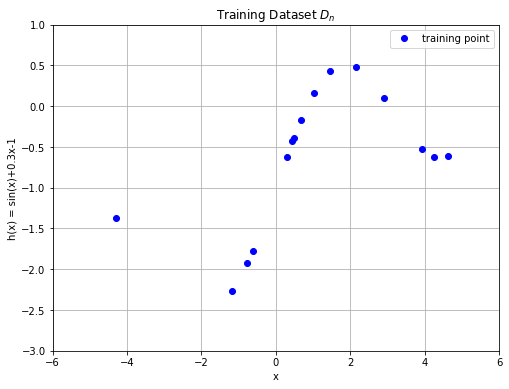

In [3]:
def h_x(x): # true mapping of x and y
    return np.sin(x) + 0.3 * x - 1
# generate X uniformely at random in interval [-5, 5]
X = np.random.uniform(low = -5, high = 5, size = (15, 1))
t = h_x(X)
# plot training data points
plt.figure(figsize=(8, 6))
plt.plot(X, t, 'bo')
plt.grid(True) # add a grid
plt.axis([-6, 6, -3, 1]) # restriction to axises
plt.xlabel('x')
plt.ylabel('h(x) = sin(x)+0.3x-1')
plt.legend(['training point'], loc='upper right')
plt.title("Training Dataset $D_n$")
plt.show()

**3. ** Plot training data points, true curve, and curve learned by `regression_descent` 

We first prepared the data for the function `regression_gradient`; we executed the function to train our model and got the parameters `w` and `b`. Function `f_x` is to compute the output a linear regression with input data `X`, the parameters `w` and `b`. Based on all these data, we plotted the curves demanded. Read the comments of the code for more details.

We also wrote a function: `analytical_solution` trying to find analytical solution of a ridge regression from training data. We found that the curves drawn with points from `regression_gradient` and `analytical_solution` are completely overlapped with each other, indicating that the parameters from gradient descent have very high confidence to be correct.

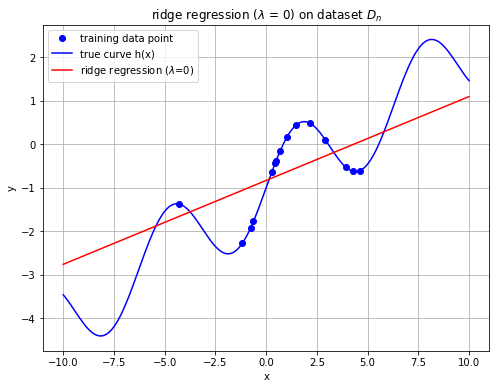

In [4]:
data = np.concatenate((X, t), axis = 1) # prepare training data
# training model to get parameters
w, b, step_losses = regression_gradient(data, 
                                        _lambda = 0.0, # no weight penalty
                                        eta = 1e-4,  # learning rate
                                        max_steps = 1e4 # max numbers of iteration
                                       ) 

def analytical_solution(data, _lambda = 0.0):
    """find analytical solution of ridge regression from data
    params
        data: training dataset n rows and d+1 columns with last column the true
        output t np.array (n, d+1)
        _lambda: regularization factor, float
    returns
        w weight vector (d, 1)
        b bias scalar
    """
    n, d = data.shape
    d -= 1 # the last column is label t
    X = data[:,:-1].reshape(n, d) # (n, d)
    t = data[:,-1].reshape(n, 1)  # (n, 1)
    X = np.concatenate((np.ones((n, 1)), X), axis = 1)
    I = np.identity(d+1)
    temp = np.mat(np.dot(X.T, X) + _lambda * I) # (d+1, d+1)
    temp = np.linalg.inv(temp) # inverse of temp
    theta = np.dot(temp, X.T) # (d+1, d+1) dot (d+1, n)-> (d+1, n)
    theta = np.dot(theta, t).reshape(-1, 1) # (d+1, n) dot (n, 1) -> (d+1, 1)
    b = float(theta[0, 0])
    w = theta[1:,:].reshape(-1, 1) # (d, 1)
    return w, b
    
# w_1, b_1 = analytical_solution(data)
    
def f_x(X, w, b):
    """generate output of a linear regression model by parameters w and b
    params
        X: variables, np.array (n, d)
        w: weights, np.array (d, 1)
        b: bias, float scalar
    returns
        y: np.dot(X, w) + b
    """
    return np.dot(X, w) + b

support = np.linspace(-10, 10, 200).reshape(-1, 1)
y = f_x(support, w, b) # ridge regression with _lambda = 0.00
h = h_x(support) # true ouput
# analytical_y = f_x(support, w_1, b_1)

plt.figure(figsize=(8, 6))
plt.grid(True) # add a grid
plt.plot(X, t, 'bo')
plt.plot(support, h, 'b-')
# plt.plot(support, analytical_y, 'g-')
plt.plot(support, y, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['training data point',
            'true curve h(x)',
            # 'analytical solution',
            'ridge regression ($\lambda$=0)'
           ], loc='upper left')
plt.title("ridge regression ($\lambda$ = 0) on dataset $D_n$")
plt.show()

In [5]:
def draw_step_loss(step_losses):
    steps = np.array([i for i in range(len(step_losses))])
    step_losses = np.array(step_losses).reshape(-1, 1)
    plt.figure(figsize=(8, 6))
    plt.grid(True) # add a grid
    plt.plot(steps, step_losses, 'b-')
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.legend(['loss'], loc='upper left')
    plt.title("loss of ridge regression ($\lambda$ = 0) on dataset $D_n$")
    plt.show()

# to see the loss trends trough the iteration, decomment next line
# draw_step_loss(step_losses)

**4.** Plot curves from ridge regression with an intermediate and a large $\lambda$

In our codes below, we use 100 and 1000 for intermediate and large $\lambda$ respectively. Run `regression_gradient` for each $\lambda$ to get corresponding optimum parameters. With these parameters and the function `f_x` implemented in last question, we can achieve different outputs of the model for ploting.

See the comments in the codes for more detail.

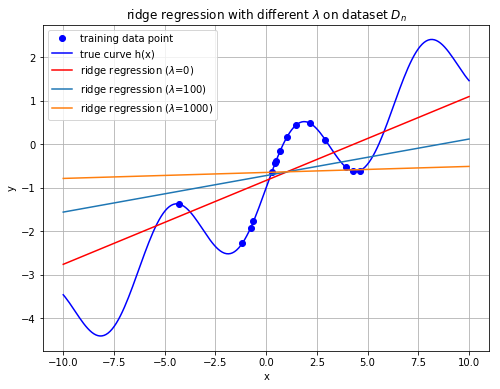

In [6]:
_lambdas = [100, 1000]
params = [] # keep parameters (w, b) for each _lambdas
for _lambda in _lambdas:
    w, b, _ = regression_gradient(data, _lambda = _lambda)
    params.append((w, b))
                               
plt.figure(figsize=(8, 6))
plt.grid(True) # add a grid
plt.plot(X, t, 'bo') # training data points
plt.plot(support, h, 'b-') # true curve
plt.plot(support, y, 'r-') # ridge regression with _lambda = 0.

legends = ['training data point',
            'true curve h(x)',
            'ridge regression ($\lambda$=0)'
          ]
for i in range(len(params)): # plot curves with different _lambda
    plt.plot(support, f_x(support, params[i][0], params[i][1]))
    legends.append('ridge regression ($\lambda$={})'.format(_lambdas[i]))
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend(legends, loc='upper left')
plt.title("ridge regression with different $\lambda$ on dataset $D_n$")
plt.show()

**5.** Plot loss of different $\lambda$s

In this section, test dataset is generated based on the requirement. A function to compute the average loss receiving output of a model and true output as main parameters is also implemented. After completing each training on certain $\lambda$. We also calculated and collected the average loss on testing data set and stored them in a list `losses`. See the comments in the codes for more detail.

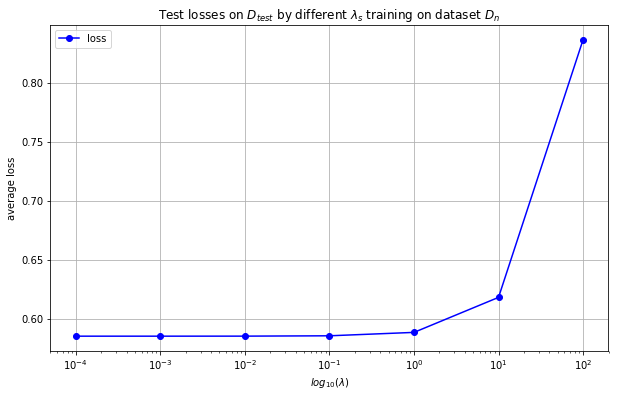

In [7]:
# Prepare test data (100 data points) from imterval [-5, 5]
X_test = np.random.uniform(-5, 5, (100, 1))
t_test = h_x(X_test)
data_test = np.concatenate((X_test, t_test), axis = 1)
# using given different lambdas
_lambdas = [0.0001,0.001,0.01,0.1,1,10,100]

def compute_average_loss(y_from_model, true_y, _lambda = 0.0, w = None):
    """compute loss, if _lambda is not zero and w is not None, the weight
    penalty will be counted to the total loss.
    params
        y_from_model: output generated by a ridge regression model
        true_y: true output
        _lambda: factor of weight penalty
        w: weight matrix(vector)
    returns
        average loss of the model
    """
    assert y_from_model.shape == true_y.shape, "shape mismatch."
    loss = np.sum(np.power(y_from_model - true_y, 2))
    if not (_lambda == 0.0 or w is None):
        loss += _lambda * np.dot(w.T, w)
    return float(loss) / len(true_y)

losses = [] # store losses with different _lambda
for _lambda in _lambdas:
    # training model with different _lambda
    w, b, _ = regression_gradient(data, 
                                  _lambda = _lambda,
                                  eta = 1e-5,
                                  max_steps = 1e5
                                 )
    y_from_model = f_x(X_test, w, b) 
    loss = compute_average_loss(y_from_model, t_test) 
    losses.append(loss)
    
# plot loss
plt.figure(figsize=(10, 6))
plt.grid(True) # add a grid
plt.xscale('log')
plt.plot(_lambdas, losses, 'bo-')
plt.xlabel('$\lambda$')
plt.ylabel('average loss')
plt.legend(['loss'], loc='upper left')
plt.title("Test losses on $D_{test}$ by different $\lambda_s$ training on dataset $D_n$")
plt.show()

**6.** Ridge regression on different polynomial pre-processed training datasets

Before combining the polynomial data pre-processing and ridge regression, we first implemented a function to generate dataset with $k$ features from original data $X$; each of the features is $i\ (i \le k)$ times power of the original data $X$.

After that, function `regression_gradient` is executed for training dataset with different $k$. Training loss and optimal parameters are stored for further computation or analysis.

It may take several seconds or minutes to run the following codes as the `max_steps` here is set to 1e6.

See comments in the following codes for more detail.

In [8]:
def polynomialize(data, k):
    """generate a np.array with shape:(n, k). the value of ith column is i times power of 
    the first column value in the same row
    param
        data: original data, np.array (n, 1)
        k: max power k >= 1
    returns
        new_data np.array (n, k)
    """
    data = data.reshape(-1, 1)
    if k < 2:
        return data
    new_data = data.copy()
    for i in range(2, k+1):
        new_data = np.concatenate((new_data, np.power(data, i)), axis = 1)
    return new_data

_lambda, k = 0.01, 5
X_polynomial = polynomialize(X, k) # polynomialized training dataset 
support_polynomial = polynomialize(support, k) # for ploting

parameters = []
training_losses = []

for l_order in range(1, k+1): # different l_order
    data = np.concatenate((X_polynomial[:, :l_order], t), axis = 1)
    eta = pow(10, -3 - l_order) # different learning rate for different order
    w, b, losses = regression_gradient(data, 
                                       _lambda = _lambda, 
                                       eta = eta, 
                                       max_steps = 1e6)
    parameters.append((w, b))
    training_losses.append(losses[-1]) # store the most recent loss

Plot ridge regression on different polynomial pre-processed dataset:

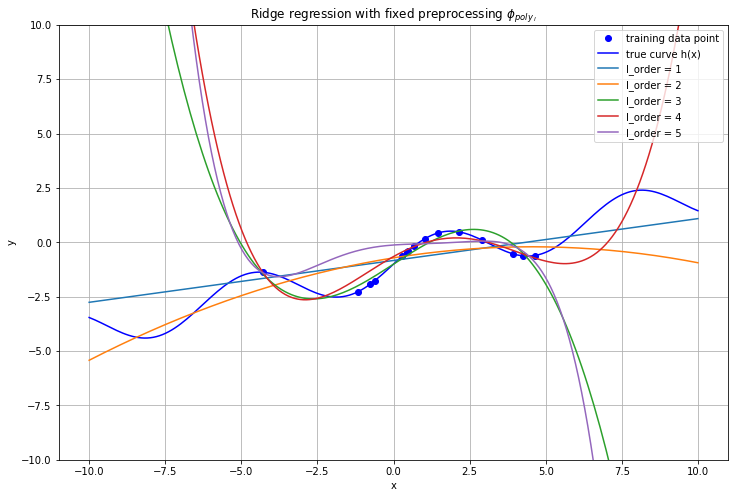

In [9]:
# ploting figure
plt.figure(figsize=(12, 8))
plt.grid(True) # add a grid
plt.plot(X, t, 'bo')
plt.plot(support, h_x(support), 'b-')

legends = ['training data point',
            'true curve h(x)'
          ]    
for l_order in range(1, k+1):
    w, b = parameters[l_order-1]
    plt.plot(support, f_x(support_polynomial[:,:l_order], w, b))
    legends.append('l_order = {}'.format(l_order))
    
plt.xlabel('x')
plt.ylabel('y')
plt.axis([None, None, -10, 10])
plt.legend(legends, loc='upper right')
plt.title("Ridge regression with fixed preprocessing $\phi_{poly_{\ l}}$")
plt.show()

**7.** Comment on what happens when $l$ increases.

Usually, When  $l$  increases, the ridge regression with polynomial pre-processing will have higher power components of the original data $\mathbf X$; thus, the capacity of the model will grow, and it will try its best to fit the training data in the interval $[-5,\ 5]$ rather than find the inner true mapping of $h(x)$ in both $[-5,\ 5]$ and $(-\infty,\ \infty)$. Therefore, as $l$ increase, the trend is that losses on training set will decrease as long as the model is well tuned and fully trained (with adequate iteration), whereas on testing set (even if data is sampled in $[-5,\ 5]$), loss will have very very high opportunity to increase.

In practice, due to non-perfect training and randomized sampling of dataset on interval $[-5,\ 5]$, losses on training set may not always decrease as $l$ increases; loss on testing set may have a local minimun at certain $l$. 

The following code computed and plotted the losses of our trained model on training set and testing set.

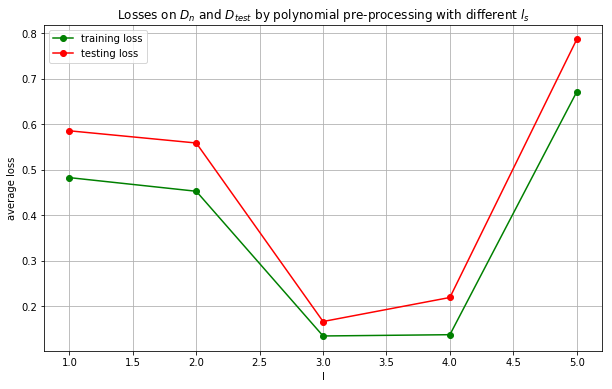

In [10]:
X_test_polynomial = polynomialize(X_test, k)
testing_losses = []
for l_order in range(1, k+1):
    w, b = parameters[l_order - 1]
    y_test = f_x(X_test_polynomial[:, :l_order], w, b)
    test_loss = compute_average_loss(y_test, t_test) 
    testing_losses.append(test_loss)  

l_orders = [i for i in range(1, k+1)]

plt.figure(figsize=(10, 6))
plt.grid(True) # add a grid
plt.plot(l_orders, training_losses, 'go-')
plt.plot(l_orders, testing_losses, 'ro-')
plt.xlabel('l')
plt.ylabel('average loss')
plt.legend(['training loss','testing loss'], loc='upper left')
plt.title("Losses on $D_n$ and $D_{test}$ by polynomial pre-processing with different $l_s$")
plt.show()

## The end of the report.
--------------------

#### Team Member
Lifeng Wan (20108546), Qiang Ye (20139927)
#### Coding Environment
python 3.5.2, numpy 1.14.2 matplotlib 2.2.0